### Data Visualization

In [3]:
dataset="train.csv"

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv(dataset)

In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df_final=df.drop(['id'],axis=1)

In [8]:
df_final.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
col=df_final.columns

In [10]:
col

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [11]:
feat=[]
val=[]
for i in col[1:]:
    feat.append(i)
    s=df_final[i].sum()
    val.append(s)

In [12]:
plot=pd.DataFrame(list(zip(feat,val)),columns=['feat','values'])

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="feat", y="values", data=plot)

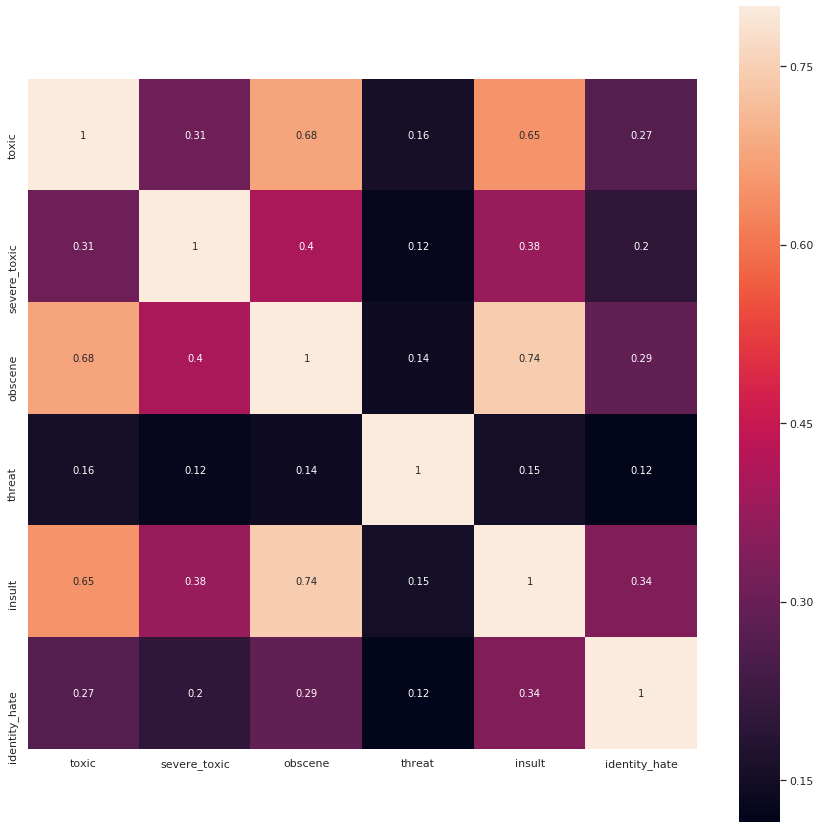

In [14]:
import seaborn as sb
import matplotlib.pyplot as plt
C_mat = df_final[1:].corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(C_mat, vmax = .8, square = True,annot=True)
plt.show()


### Data preprocessing

In [15]:
import re
def remove_special_characters(text):
    text=text.lower()
    pattern=r'[^a-zA-Z0-9 ]'
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text=re.sub(pattern,'',text)
    
    return text
def new_line_r(text):
    pattern=r'\n'
    text=re.sub(pattern,'',text)
    return text

In [16]:
df_final['comment_text'][:5]

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [17]:
df_final['text']=df_final['comment_text'].apply(remove_special_characters)

In [18]:
df_final['text'][:5]

0    explanation why the edits made under my userna...
1    d aww he matches this background colour i am s...
2    hey man i am really not trying to edit war it ...
3     more i cannot make any real suggestions on im...
4    you sir are my hero any chance you remember wh...
Name: text, dtype: object

In [19]:
df_final=df_final.drop(['comment_text'],axis=1)

In [20]:
df_final.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,text
0,0,0,0,0,0,0,explanation why the edits made under my userna...
1,0,0,0,0,0,0,d aww he matches this background colour i am s...
2,0,0,0,0,0,0,hey man i am really not trying to edit war it ...
3,0,0,0,0,0,0,more i cannot make any real suggestions on im...
4,0,0,0,0,0,0,you sir are my hero any chance you remember wh...


In [21]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
def remove_stop(text):
    stop_words = stopwords.words('english')
    cleaned=''
    words=word_tokenize(text) 
    for word in words:
        if word not in stop_words:
            cleaned=cleaned+word+' '
    return cleaned
    

In [22]:
df_final['cleaned_text']=df_final['text'].apply(remove_stop)

In [23]:
df_final['cleaned_text'][:5]

0    explanation edits made username hardcore metal...
1    aww matches background colour seemingly stuck ...
2    hey man really trying edit war guy constantly ...
3    make real suggestions improvement wondered sec...
4                       sir hero chance remember page 
Name: cleaned_text, dtype: object

In [24]:
df_final=df_final.drop(['text'],axis=1)

In [25]:
df_final.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_text
0,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,0,0,0,0,0,0,aww matches background colour seemingly stuck ...
2,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0,0,0,0,0,0,make real suggestions improvement wondered sec...
4,0,0,0,0,0,0,sir hero chance remember page


In [26]:
X=df_final['cleaned_text']

In [27]:
Y=df_final.drop(['cleaned_text'],axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer=TfidfVectorizer(max_features=500,stop_words='english')

In [31]:
vectorizer.fit(X_train)

TfidfVectorizer(max_features=500, stop_words='english')

In [32]:
x_train=vectorizer.transform(X_train)

In [33]:
x_test=vectorizer.transform(X_test)

### Models

### Predicting Labels individually

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [83]:
labels=Y_train.columns

In [84]:
labels

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [85]:
log_reg=LogisticRegression()

In [86]:
for label in labels:
    y_train_f=Y_train[label]
    y_test_f=Y_test[label]
    log_reg.fit(x_train,y_train_f)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test_f,y_pred)
    print("For label {}: accuracy obtained: {}".format(label,acc))
    

For label toxic: accuracy obtained: 0.9416569184491979
For label severe_toxic: accuracy obtained: 0.9901403743315508
For label obscene: accuracy obtained: 0.9752882687165776
For label threat: accuracy obtained: 0.997033756684492
For label insult: accuracy obtained: 0.96563753342246
For label identity_hate: accuracy obtained: 0.991769719251337


### Binary Relevance

In [122]:
from skmultilearn.problem_transform import BinaryRelevance

In [123]:
classifier = BinaryRelevance(
    classifier = LogisticRegression(),
)


In [124]:
classifier.fit(x_train, Y_train)

BinaryRelevance(classifier=LogisticRegression(), require_dense=[True, True])

In [125]:
y_pred=classifier.predict(x_test)

In [127]:
acc=accuracy_score(Y_test,y_pred)

In [128]:
acc

0.9111171457219251

### Classifier Chains

In [87]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [88]:
chain_classifier = ClassifierChain(LogisticRegression())

In [90]:
chain_classifier.fit(x_train,Y_train)

ClassifierChain(classifier=LogisticRegression(), require_dense=[True, True])

In [92]:
y_pred = chain_classifier.predict(x_test)

In [108]:
import numpy as np
acc=accuracy_score(Y_test, y_pred)

In [109]:
acc

0.9126211564171123

### Label Powerset

In [110]:
from skmultilearn.problem_transform import LabelPowerset

In [111]:
pw_set_class = LabelPowerset(LogisticRegression())


In [113]:
pw_set_class.fit(x_train,Y_train)

/home/abhijit/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LabelPowerset(classifier=LogisticRegression(), require_dense=[True, True])

In [116]:
y_pred=pw_set_class.predict(x_test)

In [117]:
acc=accuracy_score(Y_test, y_pred)

In [118]:
acc

0.9128927139037433

### Adaptive Algorithms

### Lazy Learning

In [34]:
from skmultilearn.adapt import BRkNNaClassifier

In [35]:
lazy_classifier=BRkNNaClassifier()

In [36]:
x_train_a=x_train.toarray()

In [37]:
type(x_train)

scipy.sparse.csr.csr_matrix

In [38]:
from scipy.sparse import csr_matrix, lil_matrix

In [39]:
type(Y_train)

pandas.core.frame.DataFrame

In [40]:
y_train_a=csr_matrix(Y_train).toarray()

In [41]:
lazy_classifier.fit(x_train_a, y_train_a)

/home/abhijit/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


BRkNNaClassifier()

In [42]:
x_test_a=x_test.toarray()

In [ ]:
y_pred=lazy_classifier.predict(x_test_a)

In [ ]:
acc=accuracy_score(Y_test,y_pred)

In [ ]:
acc